<a href="https://colab.research.google.com/github/cclmcesarschool/RNA-e-Deep-Learning---CESAR-School-2023.2/blob/main/Atividade3.4/LogisticRegressionMNIST-SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

In [ ]:
batch_size = 200

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 300

Dimensões dos dados de um minibatch: torch.Size([200, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 300


In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.6938,  0.8205, -0.3595, -0.3551, -0.7857, -0.2224, -0.7711,  1.2397,
          0.0723,  0.1629]], grad_fn=<AddmmBackward0>)

In [ ]:
n_epochs = 5
learningRate = 0.5


In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
epochs = []
losses = []

In [ ]:
total_trained_samples = 0
for epoch in range(n_epochs):
    for batch_idx,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Época: {epoch + 1}/{n_epochs}, batch: {batch_idx + 1}/{n_batches_train}")

Época: 1/5, batch: 1/300
Época: 1/5, batch: 2/300
Época: 1/5, batch: 3/300
Época: 1/5, batch: 4/300
Época: 1/5, batch: 5/300
Época: 1/5, batch: 6/300
Época: 1/5, batch: 7/300
Época: 1/5, batch: 8/300
Época: 1/5, batch: 9/300
Época: 1/5, batch: 10/300
Época: 1/5, batch: 11/300
Época: 1/5, batch: 12/300
Época: 1/5, batch: 13/300
Época: 1/5, batch: 14/300
Época: 1/5, batch: 15/300
Época: 1/5, batch: 16/300
Época: 1/5, batch: 17/300
Época: 1/5, batch: 18/300
Época: 1/5, batch: 19/300
Época: 1/5, batch: 20/300
Época: 1/5, batch: 21/300
Época: 1/5, batch: 22/300
Época: 1/5, batch: 23/300
Época: 1/5, batch: 24/300
Época: 1/5, batch: 25/300
Época: 1/5, batch: 26/300
Época: 1/5, batch: 27/300
Época: 1/5, batch: 28/300
Época: 1/5, batch: 29/300
Época: 1/5, batch: 30/300
Época: 1/5, batch: 31/300
Época: 1/5, batch: 32/300
Época: 1/5, batch: 33/300
Época: 1/5, batch: 34/300
Época: 1/5, batch: 35/300
Época: 1/5, batch: 36/300
Época: 1/5, batch: 37/300
Época: 1/5, batch: 38/300
Época: 1/5, batch: 39

In [ ]:
print('Final loss:', loss.data)

Text(0.5, 0, 'época')

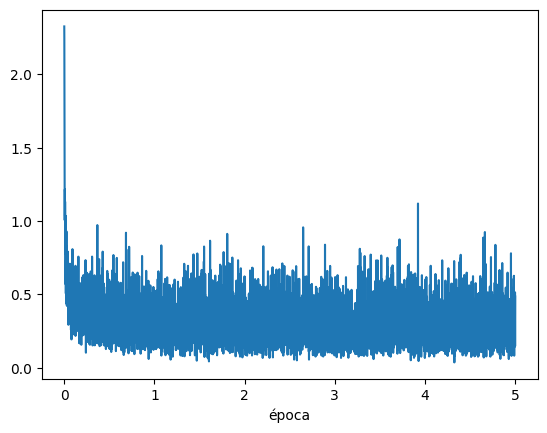

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

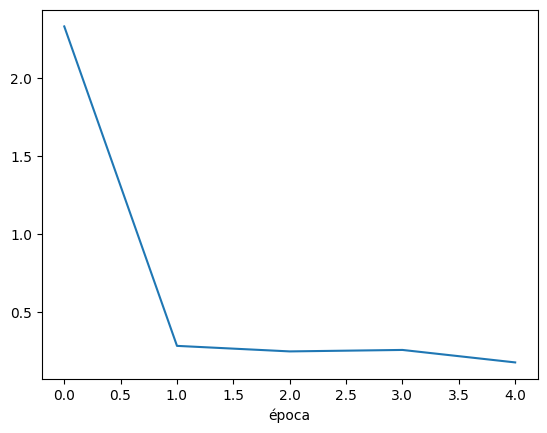

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

**Qual é o tamanho do mini-batch?** Cada minibatch contém 100 imagens.

Em uma época, quantos mini-batches existem? Depende do tamanho total do conjunto de dados e do tamanho do mini-batch.

Mini-batch = tamanho total do conjunto/tamanho do mini-batch

Mini-batch = 60000/100 = 600


**Qual é a definição de época?** Numero de loops, quantas iterações o sistema realiza, o modelo é treinado em todos os exemplos de treinamento disponíveis.

1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
Época: 1/4, batch: 600



2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.